In [ ]:
import numpy as np
import pandas as pd

In [ ]:
water=pd.read_csv('/content/comp.csv')

In [ ]:
water.head(6)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,NaN,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,NaN,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0
5,8.026773,169.333843,19168.526773,8.081496,405.527337,350.577370,15.177534,68.003932,3.735983,0


In [ ]:
water.shape

(2620, 10)

In [ ]:
water.isnull().sum()/water.shape[0]*100

ph                 14.732824
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.702290
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.770992
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
def random_sample_imputation(df):
    cols_with_missing_values = df.columns[df.isna().any()].tolist()
    for var in cols_with_missing_values:
        random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                      random_state=0)
        random_sample_df.index = df[
                df[var].isnull()].index
        df.loc[df[var].isnull(), var] = random_sample_df
    return df

In [ ]:
water=random_sample_imputation(water)

In [ ]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
water['ph'].isnull().value_counts()

False    2620
Name: ph, dtype: int64

In [ ]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000
mean,7.077948,196.200911,21973.377381,7.130793,334.336500,425.749573,14.292469,66.056207,3.965649,0.394275
std,1.589641,33.137494,8702.501618,1.584109,41.623178,81.038498,3.272972,16.169539,0.783198,0.488788
min,0.000000,47.432000,728.750830,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.090016,176.734160,15715.740730,6.125502,308.871464,365.842780,12.067417,55.681760,3.441806,0.000000
50%,7.039670,196.926487,20926.882155,7.131972,333.336876,421.884968,14.220645,66.133229,3.962234,0.000000
75%,8.040392,216.657847,27216.632550,8.105680,361.537736,481.089353,16.541731,76.782036,4.497554,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,27.006707,124.000000,6.739000,1.000000


In [ ]:
water.groupby('Potability').describe()

ph                                                    \
             count      mean       std       min       25%       50%   
Potability                                                             
0           1587.0  7.090310  1.653150  0.000000  6.069727  7.040245   
1           1033.0  7.058955  1.487383  0.227499  6.116024  7.039094   

                                Hardness              ... Trihalomethanes  \
                 75%        max    count        mean  ...             75%   
Potability                                            ...                   
0           8.116036  14.000000   1587.0  196.438919  ...       76.698094   
1           7.961721  13.175402   1033.0  195.835257  ...       77.030487   

                       Turbidity                                          \
                   max     count      mean       std       min       25%   
Potability                                                                 
0           120.030077    1587.0  3.963645  0.780287  1.450000  3.444207   
1           124.000000    1033.0  3.968728  0.788017  1.641515  3.439022   

                                          
                 50%       75%       max  
Potability                                
0           3.955091  4.490008  6.739000  
1           3.966571  4.511384  6.494249  

[2 rows x 72 columns]

In [ ]:
water['Potability'].value_counts()

0    1587
1    1033
Name: Potability, dtype: int64

In [ ]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
matrix=water.corr()
matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.092710,-0.087808,-0.021232,-0.007471,0.029155,0.030990,0.008502,-0.014304,-0.009641
Hardness,0.092710,1.000000,-0.068997,-0.029451,-0.099732,-0.015325,0.011500,-0.013655,-0.006441,-0.008904
Solids,-0.087808,-0.068997,1.000000,-0.072097,-0.119622,0.014450,0.007705,-0.011556,0.012661,0.036320
Chloramines,-0.021232,-0.029451,-0.072097,1.000000,0.032062,-0.018341,-0.017692,0.017648,-0.006820,0.016667
Sulfate,-0.007471,-0.099732,-0.119622,0.032062,1.000000,-0.023610,0.058191,0.004696,-0.002375,-0.028100
Conductivity,0.029155,-0.015325,0.014450,-0.018341,-0.023610,1.000000,0.040572,0.002966,0.004164,-0.008071
Organic_carbon,0.030990,0.011500,0.007705,-0.017692,0.058191,0.040572,1.000000,-0.005380,-0.008384,-0.024479
Trihalomethanes,0.008502,-0.013655,-0.011556,0.017648,0.004696,0.002966,-0.005380,1.000000,-0.023607,0.003304
Turbidity,-0.014304,-0.006441,0.012661,-0.006820,-0.002375,0.004164,-0.008384,-0.023607,1.000000,0.003172
Potability,-0.009641,-0.008904,0.036320,0.016667,-0.028100,-0.008071,-0.024479,0.003304,0.003172,1.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='Potability', ylabel='ph'>

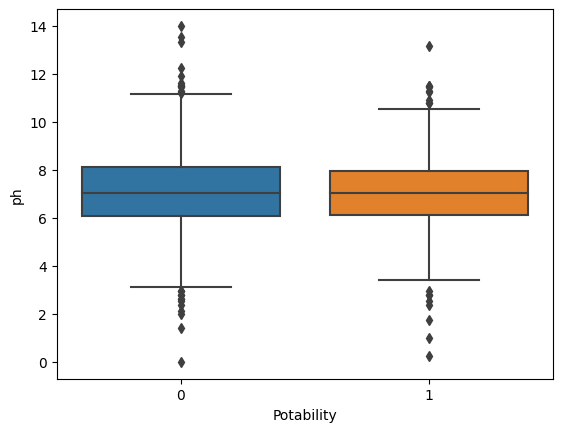

In [ ]:
sns.boxplot(data=water,x='Potability',y='ph')

<Axes: xlabel='Potability', ylabel='ph'>

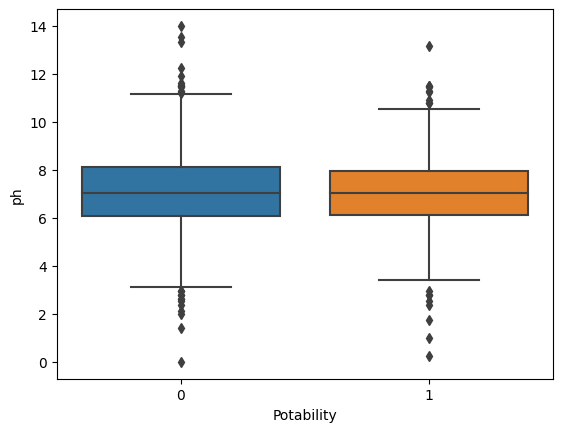

In [ ]:
sns.boxplot(data=water,x='Potability',y='ph')

In [ ]:
water.shape

(2620, 10)

In [ ]:
water.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,7.022952,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,336.652703,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0


In [ ]:
water['Potability'].value_counts()

0    1587
1    1033
Name: Potability, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def show_distributions(columns: list, data: pd.DataFrame, nrows: int = 1, ncols: int = 3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5))
    axes = axes.ravel()
    for index, column in enumerate(columns):
        sns.histplot(data[column], kde=True, ax=axes[index])
        axes[index].set_title(column)
    plt.tight_layout()
    plt.show()

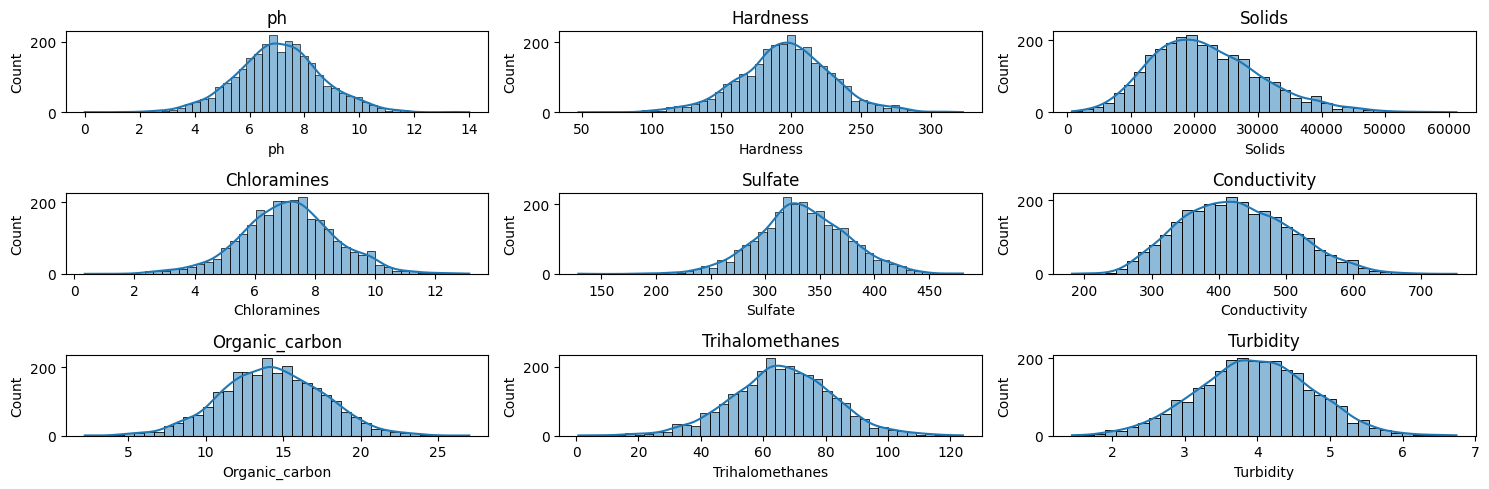

In [ ]:
show_distributions(water.columns[:-1], water,3,3)

In [ ]:
from sklearn.ensemble import IsolationForest
def remove_outliers(data: pd.DataFrame, contamination: int):
    model = IsolationForest(contamination = contamination)
    model.fit(data.to_numpy())
    return data[model.predict(data.to_numpy()) == 1]

In [ ]:
water=remove_outliers(water, 0.3)

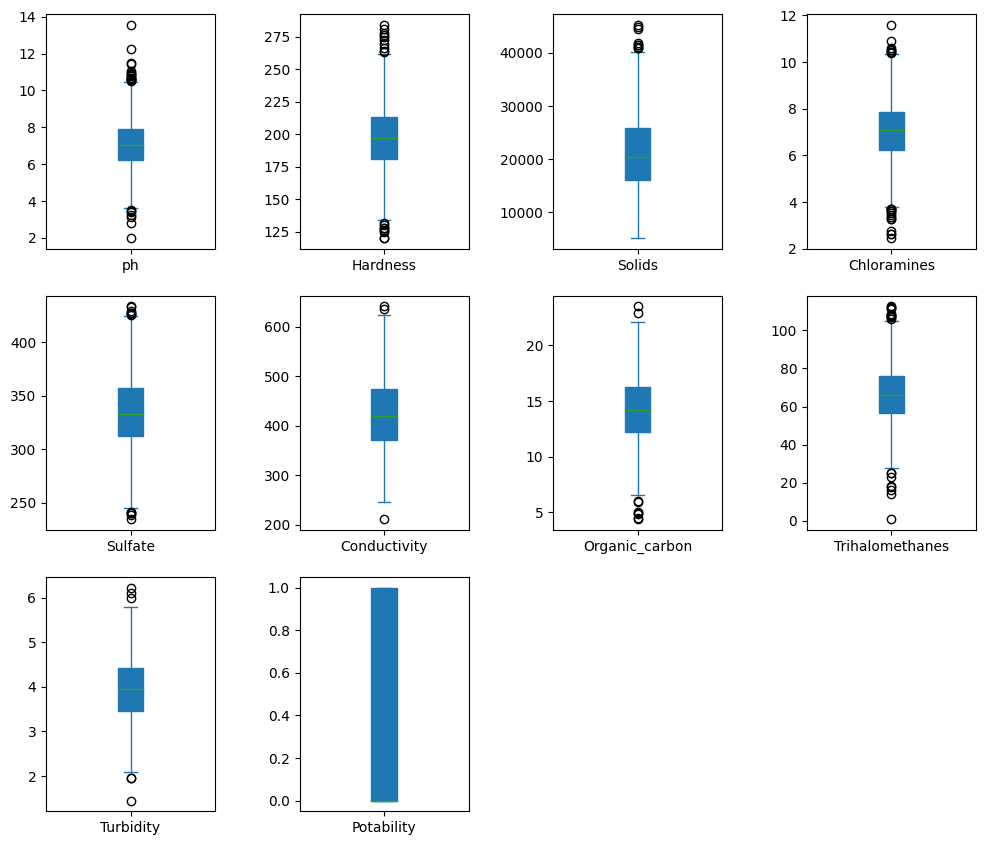

In [ ]:
df_to_plot =water.select_dtypes(include=np.number)
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import LinearSVC
import lightgbm as lg
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
y=water['Potability']
del water['Potability']

In [ ]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
x=water

In [ ]:
print(x.shape,y.shape)

(1834, 9) (1834,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [ ]:
y_train.isnull().sum()

0

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbour": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient-Boost": xgb.XGBClassifier(),
    "Linear SVM": LinearSVC(),
    "Light GBM": lg.LGBMClassifier(),
    "Extra Tree Classifier":ExtraTreesClassifier(n_estimators=100, random_state=42)
}

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    results[model_name] = {"Accuracy": accuracy, "Classification Report": classification_rep}

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print("Classification Report:")
    print(metrics["Classification Report"])
    print("=" * 40)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

[LightGBM] [Info] Number of positive: 490, number of negative: 977
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1467, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.334015 -> initscore=-0.690081
[LightGBM] [Info] Start training from score -0.690081
Model: Logistic Regression
Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       250
           1       0.00      0.00      0.00       117

    accuracy                           0.68       367
   macro avg       0.34      0.50      0.41       367
weighted avg       0.46      0.68      0.55       367

Model: Decision Tree
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

   

In [ ]:
xgb=xgb.XGBClassifier()

In [ ]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred=xgb.predict(x_test)
print(accuracy_score(pred,y_test))

0.6512261580381471


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_xgb_classifier =XGBClassifier(random_state=42, **best_params)
best_xgb_classifier.fit(x_train, y_train)
y_pred = best_xgb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Accuracy: 0.68


In [ ]:
test_data=pd.read_csv('/content/testOriginal.csv')
test_data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,id
0,NaN,218.302176,42061.322799,6.331177,324.541596,503.139245,15.712139,48.497826,4.328026,1
1,NaN,176.413638,12674.672773,8.988477,354.768115,344.420435,12.682869,83.567356,4.403877,2
2,8.926113,189.987947,15249.620244,7.076222,341.526873,361.901628,21.278095,NaN,2.752134,3
3,5.700785,185.922247,27365.106363,7.563100,NaN,359.506553,15.089441,56.463434,3.978141,4
4,5.771199,155.050893,24909.444010,6.531261,297.009319,313.701934,11.704789,85.688303,4.688959,5


In [ ]:
test_data.shape

(656, 10)

In [ ]:
x_test.shape

(367, 9)

In [ ]:
id=test_data['id']
del test_data['id']

In [ ]:
test_data.isnull().sum()

ph                 105
Hardness             0
Solids               0
Chloramines          0
Sulfate            160
Conductivity         0
Organic_carbon       0
Trihalomethanes     37
Turbidity            0
dtype: int64

In [ ]:
test_data=random_sample_imputation(test_data)

In [ ]:
test_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [ ]:
test_data.shape

(656, 9)

In [ ]:
x_train.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
543,5.821707,220.125423,40009.72361,6.631836,355.896890,493.118346,12.420834,49.129301,3.908199
578,6.980062,178.080442,35044.37128,7.760027,357.082818,381.645131,17.551382,71.111182,3.761633


In [ ]:
acc=best_xgb_classifier.predict(test_data)

In [ ]:
acc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
test_data.shape

(656, 9)

In [ ]:
result_df = pd.DataFrame({'id': id, 'Potability': acc})

In [ ]:
result_df

,id,Potability
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
651,652,0
652,653,0
653,654,0
654,655,0


In [ ]:
result_df['Potability'].value_counts()

0    638
1     18
Name: Potability, dtype: int64

In [ ]:
from google.colab import files

In [ ]:
result_df.to_csv('test.csv',index='False')

In [ ]:
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>